# Telecommunication Industry User Churn Prediction
## Author: Hai (https://www.linkedin.com/feed/)

## **In** this project, we use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

## Data source: http://www.dataminingconsultant.com/

# Part 1: Data Exploration

## Part 1.1: Understand the Raw Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  #Seaborn是基于matplotlib的图形可视化python包

## will show all the columns
pd.set_option('display.max_columns', None)

## ignore warnings:
import warnings
warnings.filterwarnings('ignore')

## read CSV data:
data = pd.read_csv('churn.all')

In [2]:
data.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


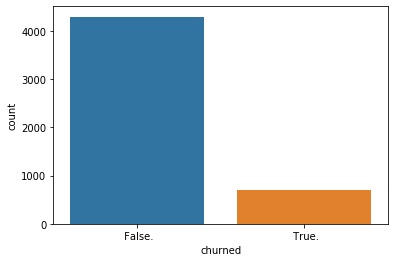

In [3]:
import matplotlib.pyplot as plt
sns.countplot(x='churned',data = data)
plt.show() 

In [4]:
print("What is the value counts for 'churned'? And what is churn rate?")
print(data['churned'].value_counts())          #.value_count 记住
print(data['churned'].value_counts()/len(data))  #

What is the value counts for 'churned'? And what is churn rate?
 False.    4293
 True.      707
Name: churned, dtype: int64
 False.    0.8586
 True.     0.1414
Name: churned, dtype: float64


In [5]:
## there is no missing value, which is good
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
## there is no missing value, which is good
print ("Missing values ?:  ",  data.isnull().sum().values.sum())
print ("Unique values ?: \n", data.nunique())

Missing values ?:   0
Unique values ?: 
 state                              51
account_length                    218
area_code                           3
phone_number                     5000
intl_plan                           2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churned                             2
dtype: int64


In [7]:
print("Shape of data: " + str(data.shape))      #和R 的用法有点不同，记住这里用法
#data.head(2)

Shape of data: (5000, 21)


## Part 1.2: Data exploring and cleaning

In [8]:
# Note that there are white spaces in the strings
data.intl_plan = data.intl_plan.map({' no': 0, ' yes':1})
data.voice_mail_plan = data.voice_mail_plan.map({' no': 0, ' yes':1})
data.churned = data.churned.map({' False.': 0, ' True.':1})

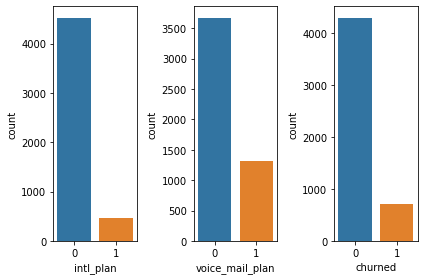

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
## plot:
fig, axes = plt.subplots(1,3)
ax1 = sns.countplot(x="intl_plan",       data = data, ax = axes[0])
ax2 = sns.countplot(x="voice_mail_plan", data = data, ax = axes[1])
ax3 = sns.countplot(x="churned",         data = data, ax = axes[2])
plt.tight_layout()


## Part 1.3:  Understand the features

In [10]:
# Compare the median of features between the two classes 
data.groupby('churned').median().drop(['area_code'], axis=1)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churned,,,,,,,,,,,,,,,,,
0,99,0,0,0,178.0,100,30.26,199.5,101,16.96,199.0,100,8.96,10.3,4,2.78,1
1,102,0,0,0,215.9,101,36.70,211.1,99,17.94,206.3,100,9.28,10.6,4,2.86,2


In [11]:
# Compare the mean values of features between the two classes 
data.groupby('churned').mean().drop(['area_code'], axis=1)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churned,,,,,,,,,,,,,,,,,
0,99.917074,0.063825,0.284416,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722
1,102.332390,0.281471,0.144272,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597


In [12]:
from scipy.stats import ks_2samp
columns = set(data.columns) - {"area_code","phone_number","state","churned"}
for feature in columns:
    churn_0, churn_1 = data.loc[data.churned == 0, feature], data.loc[data.churned == 1, feature]
    print("The K-S test for " + feature + ": ", ks_2samp(churn_0, churn_1))

The K-S test for total_eve_calls:  Ks_2sampResult(statistic=0.02443964072957161, pvalue=0.851266383906971)
The K-S test for total_night_minutes:  Ks_2sampResult(statistic=0.06274383053759104, pvalue=0.01680040720248898)
The K-S test for total_eve_charge:  Ks_2sampResult(statistic=0.11320491138661636, pvalue=3.499539898662391e-07)
The K-S test for total_night_calls:  Ks_2sampResult(statistic=0.0302110175078604, pvalue=0.624008779820064)
The K-S test for voice_mail_plan:  Ks_2sampResult(statistic=0.1401449219495175, pvalue=8.81724572653148e-11)
The K-S test for account_length:  Ks_2sampResult(statistic=0.041589364087651653, pvalue=0.22738382347527208)
The K-S test for total_eve_minutes:  Ks_2sampResult(statistic=0.11320491138661636, pvalue=3.499539898662391e-07)
The K-S test for total_day_minutes:  Ks_2sampResult(statistic=0.3045380608740718, pvalue=2.5185677370769294e-49)
The K-S test for total_intl_charge:  Ks_2sampResult(statistic=0.0960459627873539, pvalue=2.7362148593280197e-05)
The

## From the K-S test, one can tell that the p-values for total_day_calls, total_night_calls,  total_eve_calls and account_length are very high, so we cannot reject the null hypothesis that the distributions of those features for churned and not-churned customers are the same.

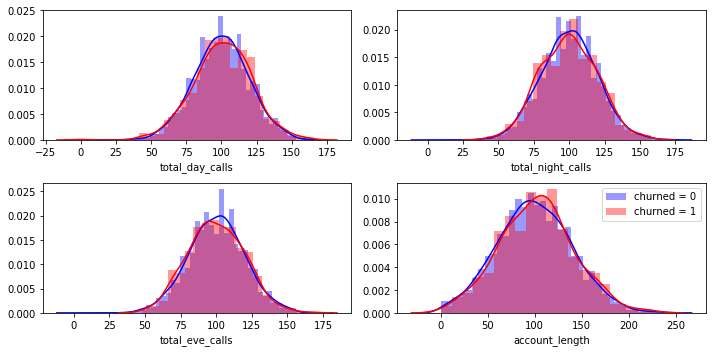

In [13]:
# check the feature distribution
#%matplotlib inline

fig, axes = plt.subplots(2,2, figsize=(10,5))

def sns_plot(axis, feature):
    sns.distplot(data.loc[data.churned == 0, feature], kde = True, label = "churned = 0", ax = axis, color = 'b')
    sns.distplot(data.loc[data.churned == 1, feature], kde = True, label = "churned = 1", ax = axis, color = 'r')

sns_plot(axes[0,0], "total_day_calls")
sns_plot(axes[0,1], "total_night_calls")
sns_plot(axes[1,0], "total_eve_calls")
sns_plot(axes[1,1], "account_length")
plt.legend()

plt.tight_layout()
plt.show()

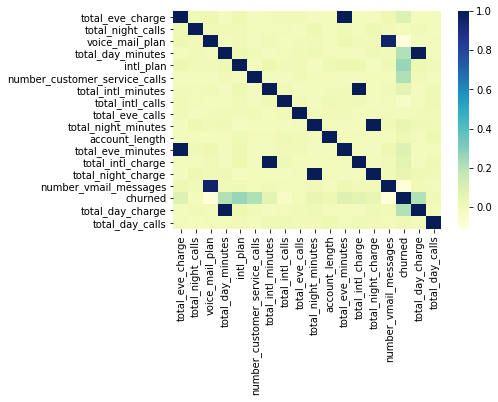

In [14]:
# correlations between features
columns = set(data.columns)
columns.remove("area_code")
corr = data[list(columns)].corr()

# show heapmap of correlations
sns.heatmap(corr, cmap="YlGnBu")

In [15]:
# calculate correlation for two-feature pairs:
from scipy.stats import pearsonr
import itertools

pearsonCols = set(data.columns)
pearsonCols.remove("churned")

for feature in pearsonCols:
    try:
        pearson_coeff = pearsonr(data[feature], data['churned'])[0]
        print("Pearson correlation between churned and " + feature + ": ", pearson_coeff)
    except:
        continue

Pearson correlation between churned and total_eve_charge:  0.08928223532043178
Pearson correlation between churned and total_night_calls:  -0.006985589814210803
Pearson correlation between churned and voice_mail_plan:  -0.11069825633642107
Pearson correlation between churned and total_day_minutes:  0.20770519477848043
Pearson correlation between churned and intl_plan:  0.2591226454643771
Pearson correlation between churned and number_customer_service_calls:  0.2125640465594381
Pearson correlation between churned and total_intl_minutes:  0.06328488783987857
Pearson correlation between churned and total_intl_calls:  -0.0468925135493193
Pearson correlation between churned and total_eve_calls:  -0.0062840712041298714
Pearson correlation between churned and area_code:  0.010195281261799373
Pearson correlation between churned and total_night_minutes:  0.04567672039250793
Pearson correlation between churned and account_length:  0.02120345168693981
Pearson correlation between churned and total

## From the pearson correlation test, we can see that the feature "intl_plan", "total_day_charge", "total_day_minutes" and "number_customer_service_calls" are important to the label, so let us check the distribution of those features.

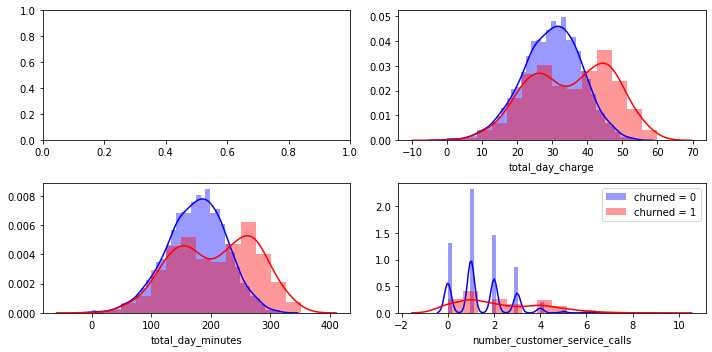

In [16]:
fig, axes = plt.subplots(2,2, figsize=(10,5))

def sns_plot(axis, feature):
    sns.distplot(data.loc[data.churned == 0, feature], kde = True, label = "churned = 0", ax = axis, color = 'b')
    sns.distplot(data.loc[data.churned == 1, feature], kde = True, label = "churned = 1", ax = axis, color = 'r')
    return

sns_plot(axes[0,1], "total_day_charge")
sns_plot(axes[1,0], "total_day_minutes")
sns_plot(axes[1,1], "number_customer_service_calls")
#sns_plot(axes[0,0], "intl_plan")

plt.legend()

plt.tight_layout()
plt.show()


## Also check the feature 'voice_mail_plan' and 'number_vmail_messages' as they are negatively correlated with churn, interesting.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

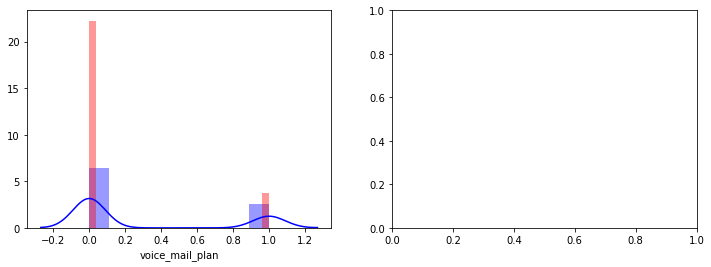

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

def sns_plot(axis, feature):
    sns.distplot(data.loc[data.churned == 0, feature], kde = True, label = "churned = 0", ax = axis, color = 'b')
    sns.distplot(data.loc[data.churned == 1, feature], kde = True, label = "churned = 1", ax = axis, color = 'r')
    return

sns_plot(axes[0], 'voice_mail_plan')
sns_plot(axes[1], 'number_vmail_messages')

plt.legend()

plt.tight_layout()
plt.show()

# Part 2: Feature Preprocessing

In [18]:
data.head(2)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [19]:
## Get labels:
Y = data["churned"].values

## Drop some extra columns:
features = data.drop(["phone_number","churned"], axis=1)
preX = pd.get_dummies(features, columns=["state","area_code","intl_plan","voice_mail_plan"])

preX.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,intl_plan_0,intl_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [20]:
# check the propotion of y = 1 in the sample:
print("The percentage of 1 among all lables: " + str(Y.sum() / Y.shape[0] * 100) + "%")

The percentage of 1 among all lables: 14.14%


In [21]:
preX.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', '

In [22]:
## train-test split: reserve 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(preX, Y, test_size = 0.2, random_state=0)

In [23]:
# Scale the training and test data independently:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_1 = ['account_length',      'number_vmail_messages', 'total_day_minutes',  'total_day_calls',
           'total_day_charge',    'total_eve_minutes',     'total_eve_calls',    'total_eve_charge',
           'total_night_minutes', 'total_night_calls',     'total_night_charge', 'total_intl_minutes',
           'total_intl_calls',    'total_intl_charge',     'number_customer_service_calls']

scalled_X_train = scaler.fit_transform(X_train[columns_1].values)
X_train[columns_1] = scalled_X_train

scalled_X_test  = scaler.fit_transform(X_test[columns_1].values)
X_test[columns_1] = scalled_X_test

In [24]:
X_train.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,intl_plan_0,intl_plan_1,voice_mail_plan_0,voice_mail_plan_1
2913,2.137203,-0.573340,-0.755170,-0.384644,-0.755450,0.967015,0.732461,0.967671,-0.839650,-1.037798,-0.841709,0.188925,-0.173917,0.193604,-0.441555,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3275,0.498045,1.435442,-0.960695,0.773846,-0.960213,-0.734231,-0.472533,-0.735329,0.855891,1.058512,0.855623,-3.718191,-1.797415,-3.719287,-0.441555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [25]:
print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4000 observation with 73 features
test data has 1000 observation with 73 features


# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training and Selection: Logistic Regression, K-Nearest Neighbors, Random Forest, Support Vector Machine and Gradient Boosting

In [ ]:
#import models:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier

# Logistic Regression
classifier_LR = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier(random_state = 0)

## support vector machine:
classifier_SVM = SVC()

## Gradient boosting:
classifier_GB = XGBClassifier(random_state=0)

In [ ]:
# Train the model
classifier_LR.fit(X_train, Y_train)
print("Test logistic regression: accuracy is ", classifier_LR.score(X_test, Y_test))

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for all three models
model_names = ["Logistic Regression", "KNN", "Random Forest", "Support Vector Machine", "Gradient Boosting"]
model_list = [classifier_LR, classifier_KNN, classifier_RF, classifier_SVM, classifier_GB]

for i in range(len(model_list)):
    classifier = model_list[i]
    cv_score = model_selection.cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Accuracy for " + model_names[i] + " is: ",cv_score.mean())

### Part 3.2: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
#import sys
#!{sys.executable} -m pip install xgboost
#https://www.cnblogs.com/wkslearner/p/9302044.html.  讲超参数

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

# helper function for printing out grid search results 
def print_grid_metrics(model_name, grid, param):
    #print("For " + model_name + ": ")
    print (model_name + ": Best AUC score: %0.3f" % grid.best_score_)
    #print (model_name + ": Best parameters set:")
    best_params = grid.best_params_
    param_set = []
    for param_name in sorted(param.keys()):
        #print("\t\t%s: %r" % (param_name, best_params[param_name]))
        param_set.append((param_name, best_params[param_name]))
    print (model_name + ": Best parameters set: ", param_set)
    return

In [ ]:
# Possible hyperparamter options for four models

model_names = ["Logistic Regression", "K-Nearest Neighbor", "Random Forest", "Gradient Boosting"]

models = [ LogisticRegression(),
           KNeighborsClassifier(),
           RandomForestClassifier(random_state = 0),
           XGBClassifier(random_state=0) ]

params = [ {'penalty':('l1', 'l2'), 'C':(0.01, 0.1, 1, 5, 10)},
           {'n_neighbors':[3,4,5,6,8,10], 'weights': ['uniform','distance']},
           {'n_estimators' : [40,60,80,100]},
           {'learning_rate': [0.01, 0.02,0.05, 0.1], 'reg_lambda': [0.1,0.5,1,2], 'reg_alpha': [0, 0.1,1,2]
}]

best_models = []

for i in range(len(models)):
    model_name, model, param = model_names[i], models[i], params[i]
    model_grid = GridSearchCV( model, param, cv = 5, scoring='roc_auc')
    model_grid.fit(X_train, Y_train)
    print_grid_metrics(model_names[i], model_grid, params[i])
    best_models.append(model_grid.best_estimator_)
    

### Part 3.3: Model Evaluation - Confusion Matrix (Accuracy, Precision, Recall)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def compute_scores(model_name, conf_matrix):
    
    tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    
    accuracy  = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    print ("For " + model_name + ":")
    print ("\tAccuracy is: %0.3f" % accuracy)
    print ("\tprecision is: %0.3f" % precision)
    print ("\trecall is: %0.3f" % recall)

# print out confusion matrices
def plot_conf_matrix(ax, model_name, conf_matrx):
    
    class_names = ['Not Churned','Churned']
    compute_scores(model_name, conf_matrix)
    
    cax = ax.matshow(conf_matrix, interpolation='nearest',cmap = "Reds")
    plt.colorbar(cax, ax=ax)
    
    ax.set_title("Confusion matrix for " + model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)


In [ ]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for all four models:

fig, axes = plt.subplots(2,2, figsize=(14,10))
axis = [ axes[0][0], axes[0][1], axes[1][0], axes[1][1] ]

for i in range(len(best_models)):
    model_name = model_names[i]
    model = best_models[i]
    conf_matrix = confusion_matrix(Y_test, model.predict(X_test))
    plot_conf_matrix(axis[i], model_name, conf_matrix)

#plt.tight_layout()
plt.show()

## Part 3.4: Model Evaluation - ROC & AUC

## Logistic Regression, KNN, Random Forest and XGboost all have predict_prob() function

In [ ]:
# define function for plotting ROC curve
def ROC_curve(model_name, ax, fpr, tpr):
    ax.plot([0, 1], [0, 1], 'k--')    
    ax.plot(fpr, tpr, label = model_name)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve - ' + model_name)
    ax.legend(loc='best')   #https://stackoverflow.com/questions/44413020/how-to-specify-legend-position-in-matplotlib-in-graph-coordinates
    return

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fig, axes = plt.subplots(2,2, figsize=(12,9))
axis = [ axes[0][0], axes[0][1], axes[1][0], axes[1][1] ]

# Use predict_proba to get the probability of sample being positive:
for i in range(len(best_models)):
    
    model_name = model_names[i]
    model = best_models[i]
    
    ## compute the probability of sample being positive:
    pred_prob = model.predict_proba(X_test)[:, 1]
    
    ## compute false-positive rate, true-positive rate:
    fpr, tpr, _ = roc_curve(Y_test, pred_prob)
    
    ## compute AUC:
    print("AUC for " + model_name + ": ", metrics.auc(fpr, tpr))
    
    ## plot ROC curve:
    ROC_curve(model_name, axis[i], fpr, tpr)

plt.tight_layout()

## Part 3.5: Threshold affects the model !
## In the following part, we will determine the optimal threshold for Random Forest and Gradient Boosting.

In [ ]:
models = [best_models[2], best_models[3]]
model_names = ["Random Forest", "Gradient Boosting"]

fig, axes = plt.subplots(1,2, figsize=(10,4))

# define function for plotting curve:
def plot_curve(model_name, ax, x, name_y1, y1, name_y2, y2, name_y3, y3):
    ax.plot(x, y1, lw = 2, label = name_y1)
    ax.plot(x, y2, lw = 2, label = name_y2 )
    ax.plot(x, y3, lw = 2, label = name_y3)
    ax.set_xlabel('Model threshold')
    ax.set_ylabel('Model score')
    ax.set_title('Model score vs threshold for ' + model_name)
    ax.legend(loc='lower center')
    ax.set_xlim([-0.05, 1.05])
    return

for i in range(len(models)):
    ## pick up models and model names:
    model, model_name = models[i], model_names[i]
    ## initialize accuracy, precision and recall:
    accuracy, precision, recall = [], [], []
    ## compute probability of positive case:
    pred_prob = model.predict_proba(X_test)[:, 1]
    ## compute fpr, tpr and threshold:
    fpr, tpr, thresh = roc_curve(Y_test, pred_prob)
    for j in range(len(thresh)):
        accuracy.append(   accuracy_score(Y_test, pred_prob >= thresh[j]) )
        precision.append( precision_score(Y_test, pred_prob >= thresh[j]) )
        recall.append(       recall_score(Y_test, pred_prob >= thresh[j]) )
    
    accuracy, precision, recall = np.asarray(accuracy), np.asarray(precision), np.asarray(recall)
    plot_curve( model_name, axes[i], thresh[1:],\
                "Accucary", accuracy[1:],\
                "Precision", precision[1:],\
                "Recall", recall[1:] )

plt.tight_layout()
plt.show()


# Part 4: Feature Selection

In [ ]:
columns = ['account_length','number_vmail_messages',
           'total_day_minutes','total_day_calls', 'total_day_charge',
           'total_eve_minutes','total_eve_calls', 'total_eve_charge',
           'total_night_minutes', 'total_night_calls', 'total_night_charge',
           'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
           'number_customer_service_calls']

## Part 4.1:  Random Forest Model - Feature Importance Discussion

In [ ]:
# check feature importance of random forest:

rf_model = best_models[2]## random forest is the 3rd model

importances = rf_model.feature_importances_

# Print the feature ranking
print("Feature importance ranking from Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X_train.columns), reverse=True):
    if "state" in v or "area" in v:
        continue
    print (v + ": " + str(k))